In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
housing = pd.read_csv(r'C:\Users\henye\OneDrive\Documents\Data Science\O Reilly Hands on Machine Learning\California Housing Data set\housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
#Checking the database
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


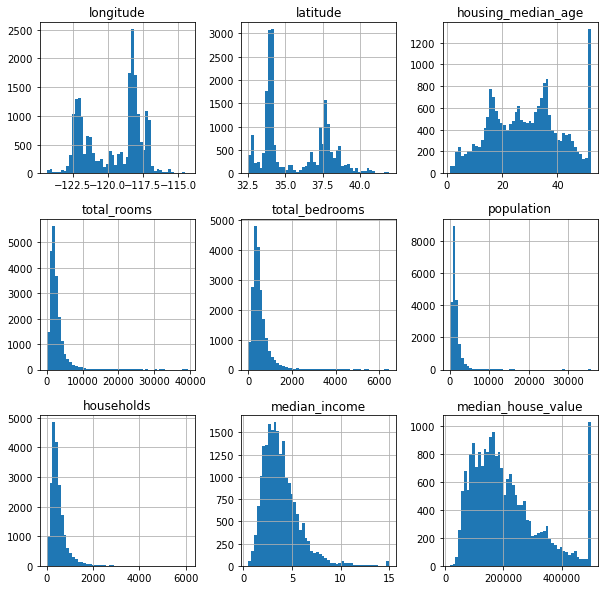

In [5]:
# Let's visualize the columns of the data sets using histograms

housing.hist(bins=50, figsize=(10,10))
plt.show()

In [6]:
X = housing.iloc[:,0:-1]
Y = housing['median_house_value']

Since our our dataset is not large enough (relative to then numbers of attributes) we will creat an income category attribute with fives categories and apply stratified sampling based on the income category

<AxesSubplot:>

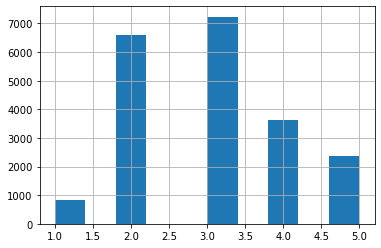

In [7]:
housing["income_cat"] = pd.cut(housing['median_income'], bins =[0,1.5,3,4.5,6,np.inf], labels = [1,2,3,4,5])
housing["income_cat"].hist()

In [8]:
#Doing stratified sampling based on the income category
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state = 42)
for train_index,test_index in sss.split(housing,housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [9]:
#checking the stratified porcentages
stratified_porcentage= strat_test_set['income_cat'].value_counts()/len(strat_test_set)
print(stratified_porcentage)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


In [10]:
#Now we need to remove the income_cat attribute so the data is back to its original state
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

# DISCOVERING AND VISUALIZING DATA

In [11]:
#making a copy of our training set
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

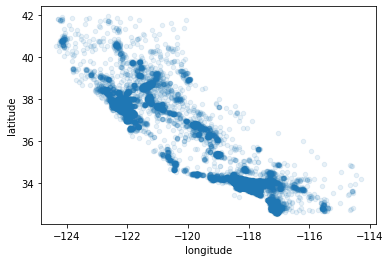

In [12]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

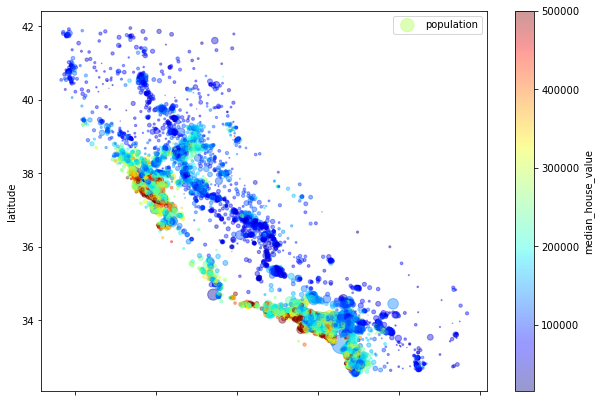

In [13]:
#using predefined color map called jet to get a better view of the radius each district's population (s) and price (c)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [14]:
#looking for correlations
corr_matrix = housing.corr()
print(corr_matrix['median_house_value'].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

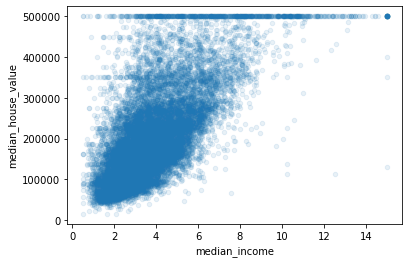

In [15]:
#the most promising attribute to predict the median house value in the median income. so let-s zoom in on their correlation
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

The correlation is indeed very strong. it can be seen clearly in the upward trend. The price cap we saw earlier is clearly visible as an horizontal line at $ 500,000. But this plot reveals another around $350,000, perhaps one around $280,000, and a few more below that. 

In [16]:
#Experimenting with attribute combinations
def new_attributes(df):  
    df["rooms_per_household"] = df ["total_rooms"]/df['households']
    df['bedrooms_per_rooms'] =df['total_bedrooms']/df['total_rooms']
    df['population_per_household'] = df['population']/df['households']
    
    return df

housing = new_attributes(housing)

In [17]:
#Now let's look at the correlation matrix again
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_rooms         -0.259984
Name: median_house_value, dtype: float64

# Preparing Data for Machine Learning Algorithms

In [18]:
#Data Cleaning
housing['total_bedrooms'].value_counts()

272.0     44
280.0     44
393.0     43
331.0     41
328.0     41
          ..
1261.0     1
1750.0     1
1459.0     1
2866.0     1
1615.0     1
Name: total_bedrooms, Length: 1810, dtype: int64

We saw earlier that total_bedrooms attribute has some missing values, so let's fix it.

In [19]:
def simple_imputing(df):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')

    #since the median can only be computed on numerical attributes, you need to create a copy of the data without the text attribute ocean_proximity:
    housing_num = df.drop('ocean_proximity',axis=1)

    #fitting the the imputer instance to the training data using fit() method.
    imputer.fit(housing_num)

    #transforming the training set by replacing mssing values with the learned medians:
    X = imputer.transform(housing_num)

    #Putting back the the Numpy array to Pandas Dataframe
    housing_simple_imputing = pd.DataFrame(X,columns = housing_num.columns,index = housing_num.index)
        
    return housing_simple_imputing

housing_tr = simple_imputing(housing)

In [20]:
#Feature scaling
def feature_scaling(df):
    from sklearn.preprocessing import MinMaxScaler
    
    #separating median_house_value column
    df_target_value = df.reset_index()["median_house_value"]
    df_no_target = df.drop("median_house_value",axis=1)
    
    #saving column names
    column_names = df_no_target.columns
    ss = MinMaxScaler()
    scaling = ss.fit_transform(df_no_target)
    scaling = pd.DataFrame(scaling,columns = column_names).reset_index()
    
    
    #concatenating scalated df with target column
    scaling["median_house_value"] = df_target_value
                
    return  scaling

housing_ss = feature_scaling(housing_tr)  

In [21]:
#Let's transform this categorical attribute from text to number
def one_hot_encoder(df,df_base):
    from sklearn.preprocessing import OneHotEncoder
    cat_encoder = OneHotEncoder()
        
    housing_cat = df_base[['ocean_proximity']]
    housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
    ohe = pd.DataFrame(housing_cat_1hot.toarray())
    ohe = pd.concat([df,ohe], axis =1)
    return ohe

housing_ohe = one_hot_encoder(housing_ss,housing)

In [22]:
#final X_test set
X_training = housing_ohe.drop('median_house_value',axis=1)

In [23]:
#Final Y_test set
Y_training = housing_ohe['median_house_value']

# SELECT AND TRAIN A MODEL

In [24]:
#Training the set
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_training,Y_training)

LinearRegression()

In [25]:
#Applying ETL to our test set

test_NA = new_attributes(strat_test_set) #Adding new attributes
test_ss = simple_imputing(test_NA) #Replacing NaN values for median value
test_fs = feature_scaling(test_ss) #Standarizing numerical values
test_ohe = one_hot_encoder(test_fs,strat_test_set) #Applying one hot encoding for the categorical column

X_test = test_ohe.drop('median_house_value',axis=1)
Y_test = test_ohe['median_house_value'].copy()


In [26]:
#Making prediction with the test set
prediction = lin_reg.predict(X_test)

In [27]:
#measure the regression model RMSE
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(Y_test,prediction)
lin_rmse = np.sqrt(lin_mse)
print('MSE=',lin_mse)
print('RMSE=',lin_rmse)

MSE= 5259133153.0606
RMSE= 72519.88108829605


In [28]:
#Let's try using a different model: RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [29]:
forest_reg = RandomForestRegressor()
forest_reg.fit(X_training,Y_training)

prediction = forest_reg.predict(X_test)

forest_mse = mean_squared_error(Y_test,prediction)
forest_rmse = np.sqrt(forest_mse)
print('MSE=',forest_mse)
print('RMSE=',forest_rmse)

MSE= 5141149022.352484
RMSE= 71701.80626980386


In [30]:
#As we can see, RFR works better on our training set
#Let's try using cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(RandomForestRegressor(),X_training,Y_training,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores = np.sqrt(-scores)

def display_scores(scores):
    print('scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation:',scores.std())
    
print(display_scores(forest_rmse_scores))

scores: [52728.59817257 47850.87794879 49582.70134131 52478.31402744
 50035.97405897 54001.77569065 48906.64971356 47960.57829876
 53078.03337631 52446.39452975]
Mean: 50906.98971581106
Standard deviation: 2167.5595243970556
None


# Fine Tuning our Model

In [31]:
#Now, let's try using GridSearch to improve even better our model
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid,cv=10,scoring='neg_mean_squared_error',return_train_score=True)

grid_search.fit(X_training,Y_training)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [32]:
best_estimator = grid_search.best_estimator_
print('Best score:',np.sqrt(-grid_search.best_score_))
print(best_estimator)

Best score: 50091.27101489375
RandomForestRegressor(max_features=6, n_estimators=30)


In [33]:
#Let's train now our moder with our best estimator

prediction = best_estimator.predict(X_test)

forest_mse = mean_squared_error(Y_test,prediction)
forest_rmse = np.sqrt(forest_mse)
print('MSE=',forest_mse,'\n')
print('RMSE=',forest_rmse,'\n')



MSE= 4639273695.299993 

RMSE= 68112.21399499499 



In [34]:
#Now that we have our final model. Let's see how precise our stimation is using 95% confidence interval for the generalization error

from scipy import stats
confidence = 0.95
squared_errors = (prediction - Y_test) **2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))

array([66006.63747   , 70154.62351481])

# SUMMARY

As we can observ, our model fit pretty well on our training set but perform worse on our training set. This is a sign of over fitting. We would recommend to get more data or apply any regularization method in order to solve this issue. Aditionally, we could try using other models to see their outputs.

Let's have it mind that for this project we use a small data set. 